## Богатов Антон Юрьевич
### Лабораторная работа 5
### Вариант 4
### Задания 5.1.4, 5.5.1, 5.7.2 и 5.8.2

### Задача 5.1.4
##### Условие:

Функция $y=f(x)$ задана таблицей значений $y_0, y_1, ..., y_n$ в точках $x_0, x_1, ..., x_n$. Используя метод
наименьших квадратов (МНК), найти многочлен $P_m(x)=a_0+a_1x+...+a_mx^m$ наилучшего среднеквадратичного приближения оптимальной степени $m=m^*$. За оптимальное значение $m^*$ принять ту степень многочлена, начиная с которой величина $\sigma_m=\sqrt{\frac{1}{n-m}\sum_{k=0}^{n}(P_m(x_k)-y_k)^2}$ стабилизируется или начинает возрастать.

##### Порядок решения задачи:
1. Задать векторы $x$ и $y$ исходных данных.
2. Составить в явном виде нормальную систему метода наименьших квадратов и решить ее используя стандартные средства линейной алгебры, найти многочлены $P_m, m=0,1,2,...$, по методу наименьших квадратов. Вычислить соответствующие им значения $\sigma_m$.
3.  Построить гистограмму зависимости $\sigma_m$ от $m$, на основании которой выбрать оптимальную степень $m^*$ многочлена наилучшего среднеквадратичного приближения.
4. На одном чертеже построить графики многочленов $P_m, m=0,1,2,...$, $m^*$, и точечный график исходной функции.
5. (*) Решить задачу МНК используя QR или SVD разложение, не формируя матрицу левой части нормальной системы в явном виде. Использовать стандартные библиотечные средства линейной алгебры для матричных разложений. Сравнить результаты полученные с помошью решения нормальной системы МНК и матричных разложений.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# размерность 15
x = np.arange(-0.5, 3.25, 0.25)
y = np.array([0.72, 1.271, 1.2, 0.7363, 0.24, -0.175, -0.36, -0.328, 0, 0.3538, 0.72, 0.6969, 0, -1.792, -5.16])
n = 15
m = np.arange(0, 15, 1)

In [4]:
def mnk(x, y, n, m):
    b = np.zeros(m)
    A = np.zeros((m, m))
    for j in range(m):
        b[j] = np.sum(y * (x**j))
        for k in range(m):
            A[j][k] = np.sum(x**(k + j))
    a = np.linalg.solve(A, b)
    return a

def P(a, m, t):
    p = 0
    for j in range(m):
        p += a[j] * (t**j)
    return p

def sigma(x, y, a, n, m):
    d = 0
    for k in range(n):
        d += (P(a, m, x[k]) - y[k])**2
    sigma = np.sqrt(d / (n - m))
    return sigma

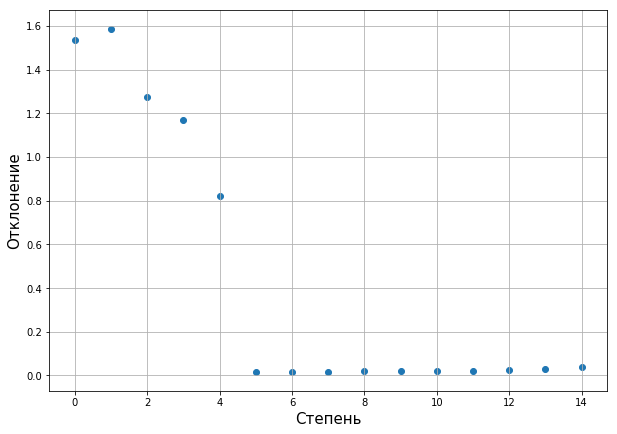

In [5]:
plt.figure(figsize=(10,7))
plt.grid(True)
sigm = []
for mm in m:
    a = mnk(x, y, n, mm)
    sigm.append(sigma(x, y, a, n, mm))
plt.scatter(m, sigm)
plt.xlabel('Степень', size=15)
plt.ylabel('Отклонение', size=15);

In [6]:
m_star = np.argmin(sigm)
print(m_star)

6


Минимальная величина сигма для $m^*=6$, далее они стабилизируются

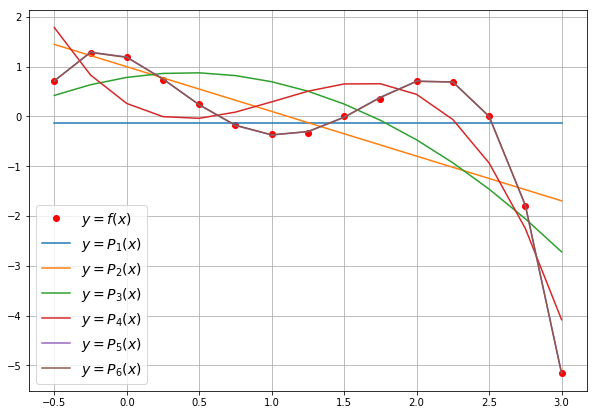

In [17]:
plt.figure(figsize=(10, 7))
plt.plot(x, y, 'or', label="$y=f(x)$")
for m in range(1, m_star + 1):
    a = mnk(x, y, x.shape[0], m)
    plt.plot(x, P(a, m, x), label="$y=P_%d(x)$"%(m))
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

Решение с помощью QR

In [37]:
b_t = np.zeros(m_star)
A_t = np.zeros((m_star, m_star))
for j in range(m_star):
    b_t[j] = np.sum(y * (x ** j))
    for k in range(m_star):
        A_t[j, k] = np.sum(x ** (k + j))

In [38]:
Q, R = np.linalg.qr(A_t)
a_t = np.dot(np.dot(np.linalg.inv(R), Q.T), b_t)
print("a = ", a_t)

a =  [ 1.18473753 -1.26193278 -2.64994413  3.11955337 -0.75480295 -0.00741707]


In [40]:
print("Погрешность при использовании QR-разложения матрицы по сравнению с обычным методом: ", np.max(np.abs(a_t - mnk(x, y, n, m_star))))

Погрешность при использовании QR-разложения матрицы по сравнению с обычным методом:  2.5343283027723373e-11


### Задача 5.5.1
##### Условие:

Известно, что $y=c1\sin(a\pi x)+c2\cos(b\pi x)$, где коэффициенты $c1$ и $c2$ подлежат определению. Используя метод наименьших квадратов, определить $c1$ и $c2$.
УКАЗАНИЕ. Для нахождения коэффициентов $c1$ и $c2$ составить нормальную систему МНК (базисные функции: $\sin(a\pi x)$ и $\cos(b\pi x)$ ) и решить ее с помощью встроенной функции solve.

In [42]:
x = -1 + 0.1 * np.arange(21)
a = 4
b = 2
y = np.array([-0.3156, -1.193, -0.6763, 0.6968, 1.2, 0.2828, -0.7221, -0.4711, 0.5024, 0.7083, -0.3085,
              -1.204, -0.6968, 0.67, 1.2049, 0.3095, -0.7008, -0.5057, 0.491, 0.7244, -0.3])

In [45]:
x_1 = np.sin(a*np.pi*x)
x_2 = np.cos(b*np.pi*x)
A = np.hstack([x_1.reshape(-1,1), x_2.reshape(-1,1)])
c1, c2 = np.linalg.lstsq(A, y, rcond=None)[0]

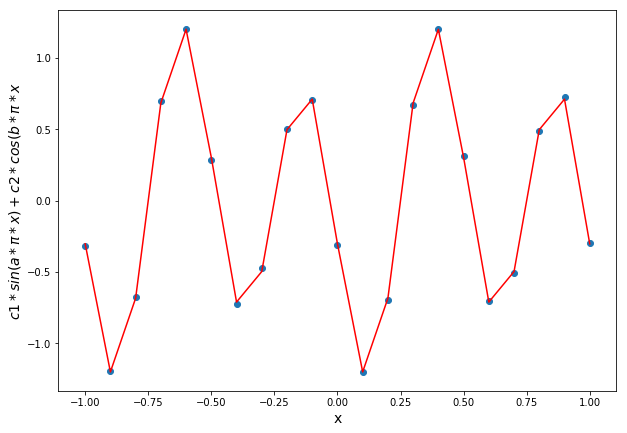

In [53]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.plot(x,c1*x_1 + c2*x_2, c = 'r')
plt.xlabel('x', size=14)
plt.ylabel('$c1*sin(a*\pi*x)+c2*cos(b*\pi*x$', size=14);

### Задача 5.7.2
##### Условие:

Дана кусочно-гладкая функция $y=f(x)$. Сравнить качество приближения функции кусочно-линейной и глобальной интерполяциями.

##### Порядок решения задачи:
1. Вычислить значения функции $y_i=f(x_i)$ произвольных точках $x_i$, $i = 0, 1, ..., k-1$, отрезка $[a, b]$, по которым будет осуществляться интерполяция функции.
2. Составить программу-функцию, вычисляющую значение интерполяционного многочлена 1-ой степени по точкам $(x_i, y_i)$ и $(x_{i+1}, y_{i+1})$ в произвольной точке отрезка $[x_i, x_{i+1}]$. С ее помощью вычислить приближенные значения функции $f(x)$ при кусочно-линейной интерполяции в $3k$ точках исходного отрезка $[a, b]$.
3. Вычислить приближенные значения функции $f(x)$ в тех же $3k$ точках отрезка при глобальной интерполяции. Для этого составить функцию, выполняющею построение интерполяционного многочлена в форме Ньютона. На одном чертеже построить графики интерполирующих функций, график исходной функции $f(x)$, а также отметить точки $(x_i, y_i), i = 0, 1, ..., k-1$, по которым осуществлялась интерполяция.
4. Вычислить практическую величину погрешностей $\Delta_j, j = 0, 1, ..., 3k-1$, приближения функции $f(x)$ в $3k$ точках для кусочно-линейной и глобальной интерполяций. На одном чертеже построить графики погрешностей. Сравнить качество приближения.

In [55]:
a_7 = -2
b_7 = 2
def func_7(x):
    return np.abs(x**2 + x)
x_7 = np.linspace(a_7, b_7, num=50)
y_7 = func_7(x_7)

In [63]:
def lin_interp(x, y):
    int_x = np.array([])
    int_y = np.array([])
    for i in range(x.shape[0] - 1):
        b = (y[i] - y[i+1]) / (x[i] - x[i+1])
        a = y[i] - b*x[i]
        t_x = 0.2 * np.random.sample(3) + x[i]
        int_x = np.append(int_x, t_x)
        int_y = np.append(int_y, a + b * t_x)
    return int_y, int_x

In [64]:
intp_y, intp_x = lin_interp(x_7, y_7)

In [79]:
def new_interp(x, y, t):
    n = x.shape[0]
    f = np.zeros((n, n))
    f[:, 0] = y
    for k in range(1, n):
        for i in range(n-k):
            f[i, k] = (f[i+1, k-1] - f[i, k-1]) / (x[i+k] - x[i])
    s = y[0]
    r = 1
    for k in range(0, n - 1):
        r = r * (t - x[k])
        s += f[0, k + 1] * r
    return s

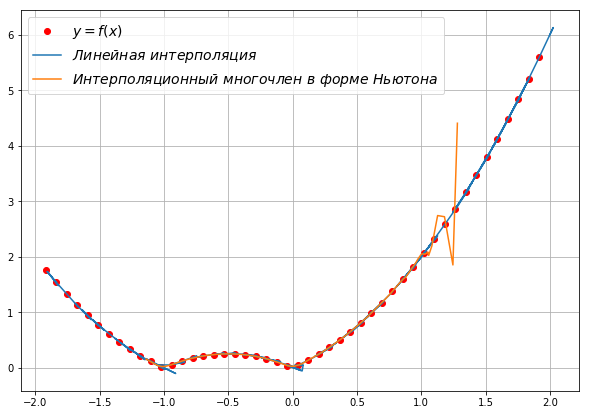

In [93]:
plt.figure(figsize=(10, 7))
plt.plot(x_7[1:-1], y_7[1:-1], 'or', label="$y=f(x)$")
plt.plot(intp_x, intp_y, label="$Линейная \ интерполяция$")
intp_x_s = np.sort(intp_x)
plt.plot(intp_x_s[30:-30], new_interp(x_7, y_7, intp_x_s)[30:-30], label="$Интерполяционный \ многочлен \ в \ форме \ Ньютона$")
plt.legend(fontsize=14)
plt.grid(True)
plt.show()

d:\python\envs\miemos\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


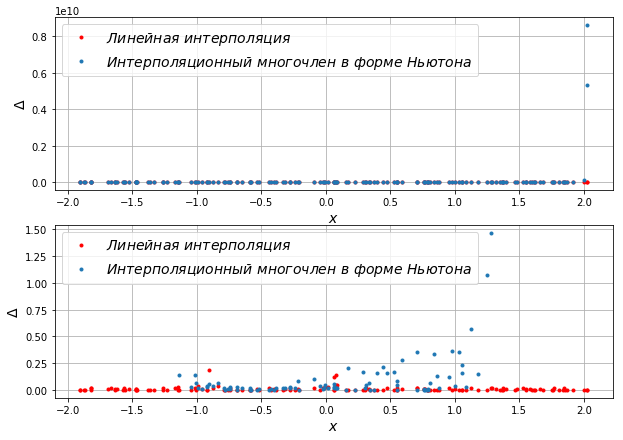

In [117]:
d_lin_int = np.abs(intp_y - func_7(intp_x))
d_new_int = np.abs(new_interp(x_7, y_7, intp_x_s) - func_7(intp_x))
fig, ax = plt.subplots(2, 1, figsize = (10, 7))
ax[0].plot(intp_x, d_lin_int, '.r', label="$Линейная \ интерполяция$")
ax[0].plot(intp_x_s, d_new_int, '.', label="$Интерполяционный \ многочлен \ в \ форме \ Ньютона$")
ax[0].legend(fontsize=14, loc=2)
ax[0].set_xlabel("$x$", size=14)
ax[0].set_ylabel("$\Delta$", size=14)
ax[1].plot(intp_x, d_lin_int, '.r', label="$Линейная \ интерполяция$")
ax[1].plot(intp_x_s[30:-30], d_new_int[30:-30], '.', label="$Интерполяционный \ многочлен \ в \ форме \ Ньютона$")
ax[1].legend(fontsize=14, loc=2)
ax[1].set_xlabel("$x$", size=14)
ax[1].set_ylabel("$\Delta$", size=14)
ax[0].grid(True)
ax[1].grid(True)

fig.show()

Как видно по графикам, линейная интерполяция даёт лучшее приближение для заданной функции. Глобальная интерполяция в некоторых точках даёт большую погрешность, но в некоторых точках приближение имеет погрешность меньше, чем при линейной интерполяции. Такая погрешность в глобальной интерполяции объясняется неправильным выбором узлов интерполяции для данной функции.

### Задача 5.8.2
##### Условие:

Дана функция $y=f(x)$. Приблизить $f(x)$ методом глобальной интерполяции при равномерном и чебышевском распределениях узлов интерполяции. Сравнить качество приближения.

##### Порядок решения задачи:
1. Составить программу-функцию построения интерполяционного многочлена при произвольном распределении узлов (количество узлов - любое).
2. Используя составленную программу, вычислить приближенные значения функции $f(x)$ в $3k$ точках исходного отрезка $[a, b]$ по $k$ узлам интерполяции, распределенным равномерно на отрезке. На одном чертеже построить графики интерполяционного многочлена и исходной функции.
3. Используя составленную программу, вычислить приближенные значения функции $f(x)$ в тех же $3k$ точках исходного отрезка по $k$ узлам интерполяции, имеющим чебышевское распределение. На одном чертеже построить графики интерполяционного многочлена и исходной функции.
4. Сравнить качество приближения функции $f(x)$ при разном распределении узлов.
5. Выполнить п. 2-4, строя интерполяционный многочлен по $2k$ узлам интерполяции.
6. Сравнить результаты при разном числе узлов.

In [336]:
k = 100
x = np.linspace(1.5, 3.5, num=k)
def func_8(x):
    return np.exp(x) * np.sin(5*x)
y = [func_8(i) for i in x]

In [337]:
X_matrix = []
for i in range(k):
    x_line = []
    for j in range(k):
        x_line.append(x[i]**j)
    X_matrix.append(x_line)
X_matrix = np.array(X_matrix)
a = np.linalg.solve(X_matrix, y)

In [338]:
def calc_global_interpolation(x, a):
    s = 0
    for i in range(k):
        s += a[i] * (x**i)
    return s

In [339]:
x1 = np.linspace(1.5, 3.5, num=3*k)
y1 = [calc_global_interpolation(i,a) for i in x1]

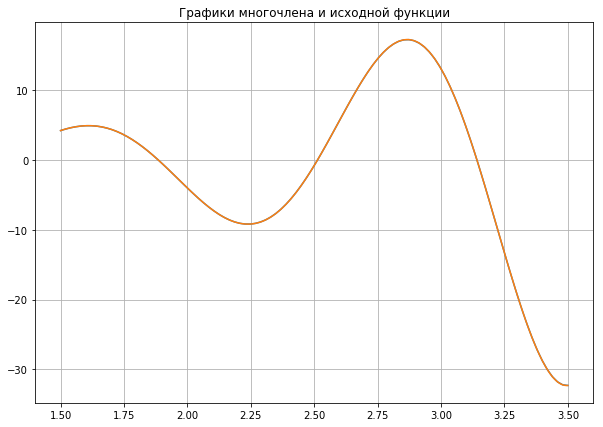

In [340]:
plt.figure(figsize=(10,7))
plt.grid(True)
plt.title("Графики многочлена и исходной функции")
plt.plot(x, y)
plt.plot(x1, y1);

In [341]:
xc = np.array([np.cos((2*i+1)/(2*k)*np.pi) for i in range(k)])+4.5*0.5
yc = [func_8(i) for i in xc]
X_matrix_ch = []
for i in range(k):
    x_line = []
    for j in range(k):
        x_line.append(xc[i]**j)
    X_matrix_ch.append(x_line)
X_matrix_ch = np.array(X_matrix_ch)
ac = np.linalg.solve(X_matrix_ch, yc)
yc1 = [calc_global_interpolation(i, ac) for i in x1]

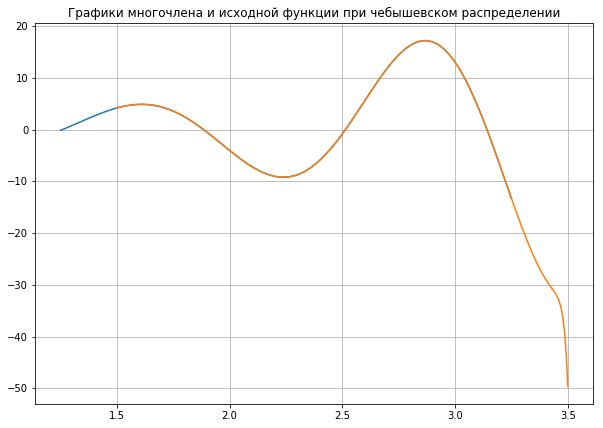

In [342]:
plt.figure(figsize=(10,7))
plt.grid(True)
plt.title("Графики многочлена и исходной функции при чебышевском распределении")
plt.plot(xc, yc)
plt.plot(x1, yc1);

In [343]:
yf = [func_8(i) for i in x1]
er1 = max([abs(yf[i]-y1[i]) for i in range(3*k)])
er2 = max([abs(yf[i]-yc1[i]) for i in range(3*k)])
print(er1)
print(er2)

6.096217219919708e-08
17.361823767898287


In [344]:
x_new = np.linspace(1.5, 3.5, num=2*k)
y_new = [func_8(i) for i in x_new]
X_matrix_new = []
for i in range(2*k):
    x_line = []
    for j in range(2*k):
        x_line.append(x_new[i]**j)
    X_matrix_new.append(x_line)
X_matrix_new = np.array(X_matrix_new)
a_new = np.linalg.solve(X_matrix_new, y_new)
y1_new = [calc_global_interpolation(i, a_new) for i in x1]

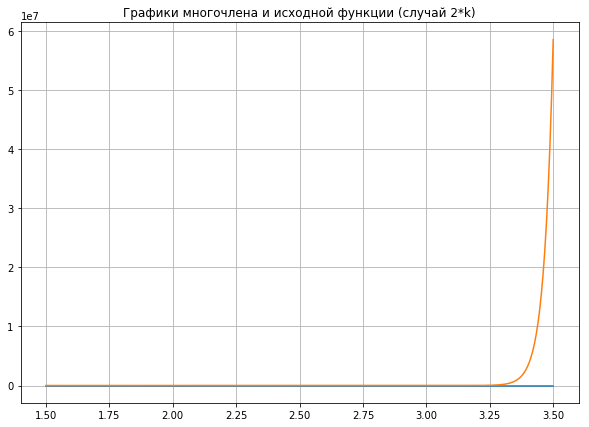

In [345]:
plt.figure(figsize=(10,7))
plt.grid(True)
plt.title("Графики многочлена и исходной функции (случай 2*k)")
plt.plot(x_new, y_new)
plt.plot(x1, y1_new);

In [346]:
xc_new = np.array([np.cos((2*i+1)/(4*k)*np.pi) for i in range(2*k)])+4.5*0.5
yc_new = [func_8(i) for i in xc_new]
X_matrix_ch_new = []
for i in range(2*k):
    x_line = []
    for j in range(2*k):
        x_line.append(xc_new[i]**j)
    X_matrix_ch_new.append(x_line)
X_matrix_ch_new = np.array(X_matrix_ch_new)
ac_new = np.linalg.solve(X_matrix_ch_new, yc_new)
yc1_new = [calc_global_interpolation(i,ac_new) for i in x1]

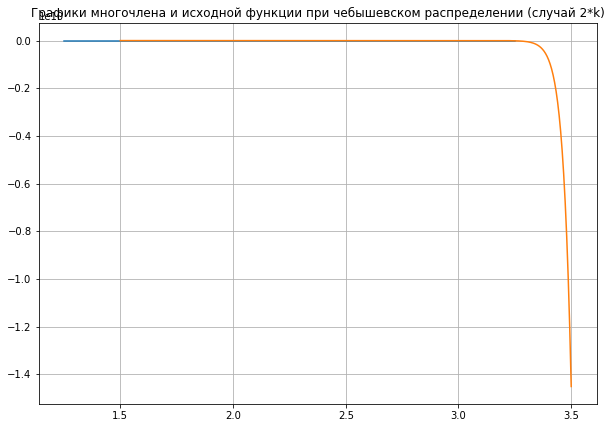

In [347]:
plt.figure(figsize=(10,7))
plt.grid(True)
plt.title("Графики многочлена и исходной функции при чебышевском распределении (случай 2*k)")
plt.plot(xc_new,yc_new)
plt.plot(x1,yc1_new);

In [348]:
er1 = max([abs(yf[i]-y1_new[i]) for i in range(2*k)])
er2 = max([abs(yf[i]-yc1_new[i]) for i in range(2*k)])
print(er1)
print(er2)

0.03758970432945574
7.465605048234343
